# Demographic modelling with `dadi`

In [1]:
# Load packages
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [77]:
load_replicate_likelihoods <- function(path){
    
    name <- basename(path)
    run <- str_extract(string = name, pattern = '(?<=pop1_)\\d(?=\\.)')
    
    df <- suppressMessages(read_delim(path, delim = '\t'))
#     param_labels <- str_extract(string = last(names(summary_short)), pattern = '(?<=\\().*(?=\\))')
#     param_labels <- unlist(str_split(param_labels, pattern = ','))
    df_mod <- df %>% 
        dplyr::select(-starts_with('optimized')) %>% 
#         rename('optimized_params' = last(names(.))) %>% 
#         separate(optimized_params, sep = ',', into = param_labels) %>% 
#         separate(Replicate, sep = '_', into = c('x1', 'Round', 'x2', 'Replicate')) %>% 
#         dplyr::select(-x1, -x2) %>% 
        mutate(run = run)
    return(df_mod)
}

In [92]:
likelihoods_df <- list.files('../../results/dadi/', pattern = '*.optimized.txt', recursive = TRUE, full.names = TRUE) %>% 
    purrr::map_dfr(., load_replicate_likelihoods)

In [95]:
top_replicates_df <- likelihoods_df %>% 
    group_by(Model, run) %>% 
    # Get replicate with the lowest AIC for each run of each model
    filter(AIC == min(AIC)) %>%  
    # Keep only single replicate if AIC values are the same
    distinct(Model, run, AIC, .keep_all = TRUE) %>% 
    arrange(AIC) %>% 
    ungroup()
top_replicates_df

Model,Replicate,log-likelihood,AIC,chi-squared,theta,run
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
split_no_mig,Round_4_Replicate_12,-67510.51,135027.0,12650590,197256.0,4
split_no_mig,Round_4_Replicate_1,-67555.91,135117.8,11096822,197168.0,3
split_no_mig,Round_4_Replicate_26,-67658.53,135323.1,10863208,197756.6,2
split_no_mig,Round_4_Replicate_9,-67672.52,135351.0,11234196,196561.0,5
split_asym_mig,Round_4_Replicate_25,-67698.94,135407.9,13093515,195639.2,1
split_sym_mig,Round_4_Replicate_12,-67841.63,135691.3,12234073,195605.9,3
split_no_mig,Round_4_Replicate_32,-67843.49,135693.0,15267078,196535.2,1
split_growth_rur_no_mig,Round_4_Replicate_25,-67925.47,135856.9,14106607,198880.8,2
split_growth_rur_no_mig,Round_4_Replicate_3,-67929.60,135865.2,14658255,198771.0,3


In [120]:
load_optimized_params <- function(path){
    
    name <- basename(path)
    run <- str_extract(string = name, pattern = '(?<=pop1_)\\d(?=\\.)')
    df <- suppressMessages(read_delim(path, delim = '\t'))
    param_labels <- str_extract(string = last(names(df)), pattern = '(?<=\\().*(?=\\))')
    param_labels <- unlist(str_split(param_labels, pattern = ','))
    df_mod <- df %>% 
        rename('optimized_params' = last(names(.))) %>% 
        separate(optimized_params, sep = ',', into = param_labels) %>% 
        separate(Replicate, sep = '_', into = c('x1', 'Round', 'x2', 'Replicate')) %>% 
        dplyr::select(-x1, -x2) %>% 
        mutate(run = run) %>% 
        rename('log_likelihood' = 'log-likelihood')
    return(df_mod)
}

In [121]:
top_model <- top_replicates_df %>% filter(row_number() == 1) %>% pull(Model)
top_model

[1] "split_no_mig"

In [122]:
optimized_params_top_model <- list.files(paste0('../../results/dadi/', top_model, '/'), 
                                         pattern = '*.optimized.txt', recursive = TRUE, full.names = TRUE) %>% 
    purrr::map_dfr(., load_optimized_params)

In [123]:
head(optimized_params_top_model)

Model,Round,Replicate,log_likelihood,AIC,chi-squared,theta,nu1,nu2,T,run
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
split_no_mig,1,1,-2126644.4,4253294.8,3.637285e+07,143227.00,2.5496,0.2045,0.35,1
split_no_mig,1,2,-698184.6,1396375.3,2.641433e+06,92322.77,2.2542,4.6578,0.3745,1
split_no_mig,1,3,-2455828.8,4911663.6,7.387153e+07,86762.32,0.6346,3.4419,1.0899,1
split_no_mig,1,4,-1121811.5,2243628.9,6.201825e+06,131802.51,0.407,4.3949,0.2413,1
split_no_mig,1,5,-298778.9,597563.8,8.726039e+05,127234.37,2.8878,2.7959,0.1527,1
split_no_mig,1,6,-6896937.2,13793880.5,6.676615e+10,64694.48,0.6028,2.5995,4.4472,1


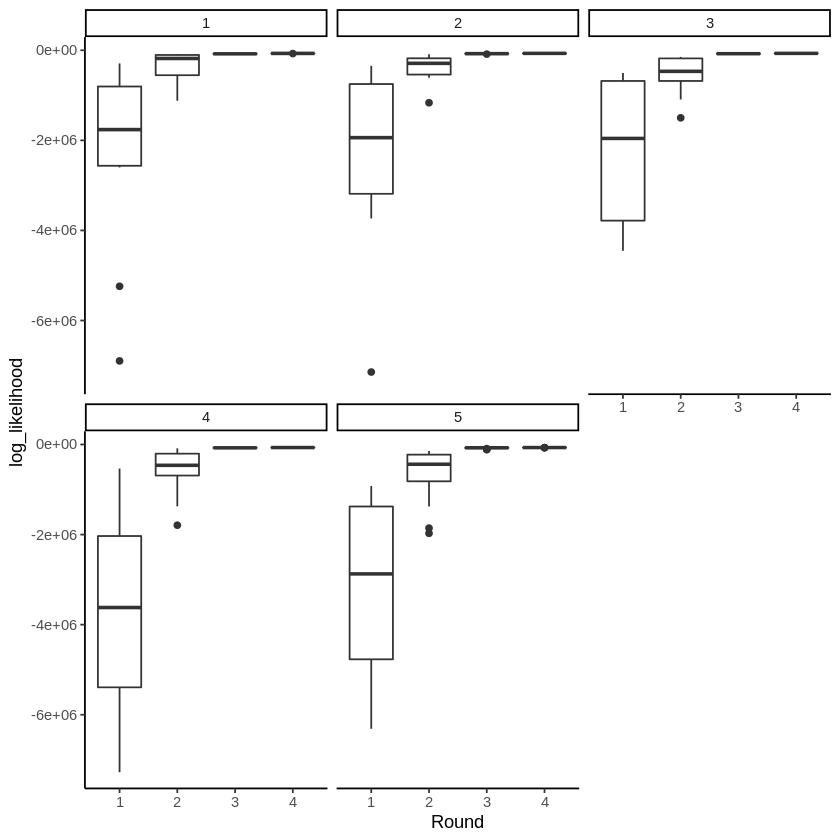

In [124]:
ggplot(optimized_params_top_model, aes(x = Round, y = log_likelihood)) +
    facet_wrap(~run) +
    geom_boxplot() +
    theme_classic()

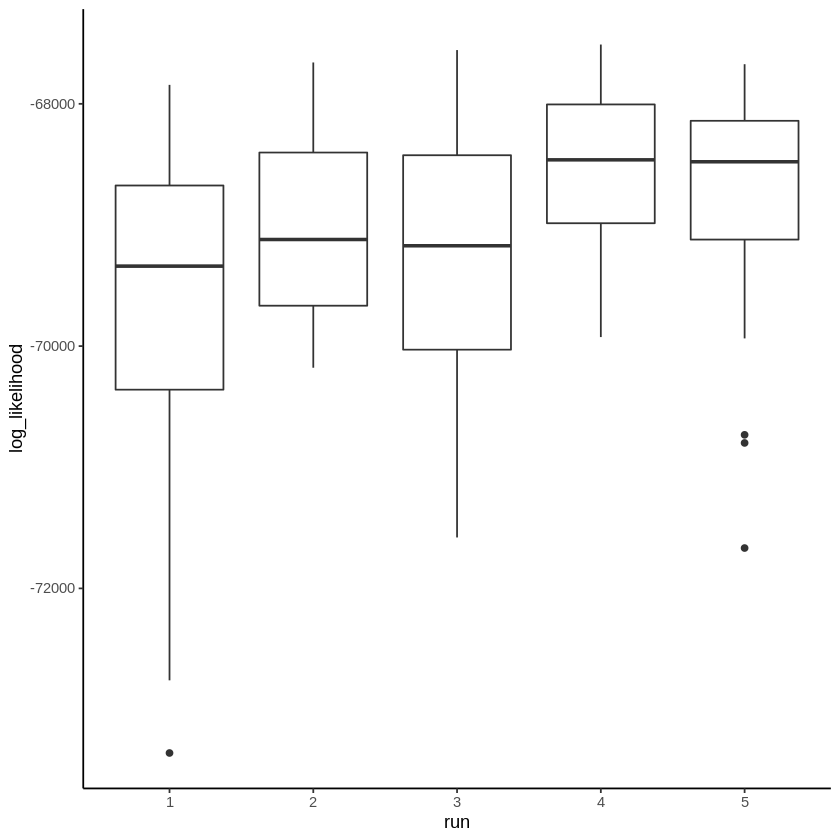

In [140]:
optimized_params_top_model %>% 
    filter(Round == max(Round)) %>% 
    ggplot(., aes(x = run, y = log_likelihood)) +
        geom_boxplot() +
        theme_classic()

In [156]:
optimized_params_top_model %>% 
    group_by(run) %>% 
    filter(AIC == min(AIC)) %>% 
    arrange(AIC)

Model,Round,Replicate,log_likelihood,AIC,chi-squared,theta,nu1,nu2,T,run
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
split_no_mig,4,12,-67510.51,135027.0,12650590,197256.0,0.8503,1.0487,0.0102,4
split_no_mig,4,1,-67555.91,135117.8,11096822,197168.0,0.8744,0.9836,0.0106,3
split_no_mig,4,26,-67658.53,135323.1,10863208,197756.6,0.8116,0.9475,0.0101,2
split_no_mig,4,9,-67672.52,135351.0,11234196,196561.0,0.9003,1.0571,0.0111,5
split_no_mig,4,32,-67843.49,135693.0,15267078,196535.2,0.8259,1.3544,0.0104,1
